### Exploring Word Embeddings

with Gensim Word2Vec

In [2]:
#!pip install --upgrade gensim

In [28]:
# Setup some test senctences
sentences = [
    'Tears come from the heart and not from the brain.',
    'The human brain is an incredible pattern-matching machine.',
    'The chief function of the body is to carry the brain around.',
    'Ideas not coupled with action never become bigger than the brain cells they occupied.',
    'Math is like going to the gym for your brain. It sharpens your mind.',
    'I spend a lot of time upside down. It increases the blood flow to the brain, so it really helps your creativity.',
    'That brain of mine is something more than merely mortal, as time will show.',
    'If little else, the brain is an educational toy.',
    'Remember that politics, colonialism, imperialism and war also originate in the human brain.',
    'Humor is by far the most significant activity of the human brain.',
    'If only we could pull out our brain and use only our eyes.'
]

In [29]:
# First we need to normalize and tokenize the words
from nltk.tokenize import word_tokenize
import re

sentences = [re.sub(r'[^\w]', ' ', s).lower() for s in sentences]
sentences = [word_tokenize(s) for s in sentences]

In [30]:
# Now we remove some stop words
from nltk.corpus import stopwords

sentences = [[word for word in sentence if word not in stopwords.words('english')] for sentence in sentences]

In [31]:
# And now we train the embeddings
from gensim.models import Word2Vec

model = Word2Vec(sentences, min_count=1)
print(model)

Word2Vec(vocab=62, size=100, alpha=0.025)


C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [32]:
# Look at the learned vocabulary
print(list(model.wv.vocab.items())[0:5])

[('tears', <gensim.models.keyedvectors.Vocab object at 0x0000018CEB77E400>), ('come', <gensim.models.keyedvectors.Vocab object at 0x0000018CEB77E748>), ('heart', <gensim.models.keyedvectors.Vocab object at 0x0000018CEB77EEF0>), ('brain', <gensim.models.keyedvectors.Vocab object at 0x0000018CEB77E7F0>), ('human', <gensim.models.keyedvectors.Vocab object at 0x0000018CEB77E7B8>)]


In [33]:
# Thats not much of a help, try to visualize this

# First get the underlying vectors
X = model[model.wv.vocab]
X

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


array([[-0.00109066, -0.00135614, -0.00478783, ...,  0.00273376,
         0.00338832,  0.00020635],
       [ 0.00073953,  0.00452043,  0.00309499, ..., -0.00189825,
         0.00064733,  0.00279351],
       [-0.00159218, -0.0015647 , -0.00178916, ...,  0.00175309,
        -0.00036024, -0.00030785],
       ...,
       [ 0.00145715, -0.00163543,  0.00285805, ...,  0.00491528,
        -0.00094724,  0.00473272],
       [ 0.00422811, -0.00422007,  0.00487379, ..., -0.00151415,
         0.00040469,  0.00067458],
       [-0.00328862, -0.00471347, -0.00127712, ...,  0.00431843,
        -0.00245737,  0.00413394]], dtype=float32)

In [34]:
# And now we plot this by reducing it to 2 dimensions
from sklearn.decomposition import PCA

# Create model for component analysis
pca = PCA(n_components=2)

# Train model
result = pca.fit_transform(X)

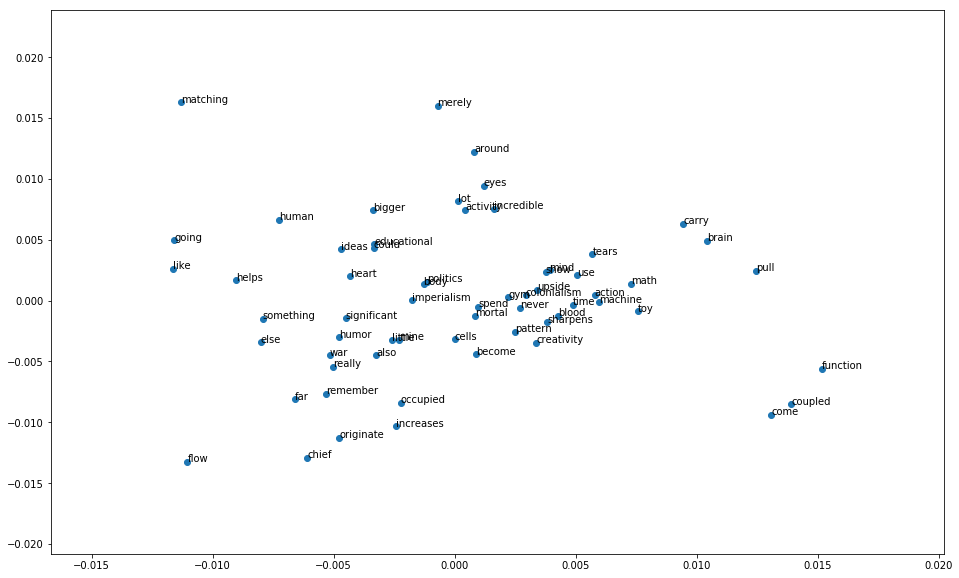

In [35]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Increase figure size
rcParams['figure.figsize'] = 16,10

plt.scatter(result[:, 0], result[:, 1])

words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    words = list(model.wv.vocab)

Interpetation? The corpus is to small for a good model. And lemmatization and stemming would be necessary too...